In [ ]:
!pip install osmnx
import osmnx as ox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 49.7 MB/s eta 0:00:00


In [ ]:
import rasterio
from rasterio.warp import transform_bounds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

def get_latlon_bbox(tif_path):
    with rasterio.open(tif_path) as src:
        # Original bounding box in the image's CRS
        bounds = src.bounds
        crs = src.crs

        # Convert bounding box to WGS84 (lat/lon)
        latlon_bounds = transform_bounds(crs, "EPSG:4326",
                                         bounds.left, bounds.bottom,
                                         bounds.right, bounds.top)
        min_lon, min_lat, max_lon, max_lat = latlon_bounds
        return min_lon, min_lat, max_lon, max_lat
# Example usage:
tif_path = "/content/drive/MyDrive/P2 - Amazon ITU - PESU/Visual_data/GEE_Exports_all/id_1261.tif"
min_lon, min_lat, max_lon, max_lat = get_latlon_bbox(tif_path)
print("Bounding box in lat/lon:")
print(f"min_lat: {min_lat}, max_lat: {max_lat}")
print(f"min_lon: {min_lon}, max_lon: {max_lon}")

G = ox.graph_from_bbox(( min_lon,max_lat, max_lon,  min_lat), network_type="all")
ox.plot_graph(G)

Bounding box in lat/lon:
min_lat: -14.24036337844789, max_lat: -14.194189972844146
min_lon: -53.25446566234395, max_lon: -53.20712444687085


In [ ]:

def get_latlon_bbox(tif_path):
    with rasterio.open(tif_path) as src:
        # Original bounding box in the image's CRS
        bounds = src.bounds
        crs = src.crs

        # Convert bounding box to WGS84 (lat/lon)
        latlon_bounds = transform_bounds(
            crs, "EPSG:4326",
            bounds.left, bounds.bottom,
            bounds.right, bounds.top)
        min_lon, min_lat, max_lon, max_lat = latlon_bounds

        print("Bounding box in lat/lon:")
        print(f"min_lat: {min_lat}, max_lat: {max_lat}")
        print(f"min_lon: {min_lon}, max_lon: {max_lon}")

    # Try fetching OSM graph
    try:
        G = ox.graph_from_bbox(( min_lon,max_lat, max_lon,  min_lat), network_type="all")
    except Exception:
        return False  # OSMnx couldn’t fetch anything

    if len(G.nodes) == 0:
        return False
    else:
        ox.plot_graph(G)  # plot if data exists
        return True

tif_path = "/content/drive/MyDrive/P2 - Amazon ITU - PESU/Visual_data/GEE_Exports_all/id_1458.tif"

print( get_latlon_bbox(tif_path) )

Bounding box in lat/lon:
min_lat: -5.460948443690983, max_lat: -5.41477503808724
min_lon: -57.72753678808869, max_lon: -57.68145321401336
False


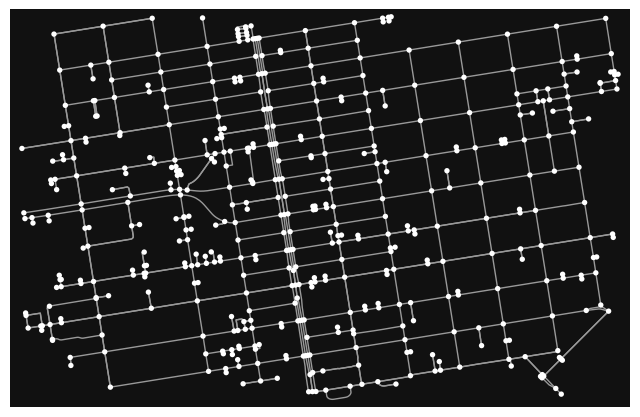

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
ox.plot_graph(G)